<div style = "font-size: 20px">
    <h1><center>
        LOJİSTİK REGRESYON
    </center></h1>
</div>

---------

# 1. Veri setini ve gerekli kütüphaneleri "import" edelim.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.read_excel('data1.xlsx')
# df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
df.shape

(100, 3)

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [7]:
X[:10]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331]])

In [8]:
y[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

------------

# 2. X girdi matrisini normalize edelim.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
X_scaled = sc.fit_transform(X)

------------

# 3. Lojistik regresyon modelini kuralım.

<div style = "font-size: 16px">
\begin{align}
    LogLoss : J(w)={-}{ \frac{1}{m} }\sum_{i=0}^m {[ y^{(i)}{log( h_{w}(x^{(i)})+{(1-y^{(i)})   
    {log(1- h_{w}(x^{(i)})}})}]}   
\end{align}
</div>    

<div style = "font-size: 16px">
\begin{align}
     sigmoid : h_w(x)= \frac{1}{(1+ e^{-Xw})} 
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
     w_j = w_j+{\alpha\frac{1}{m}}{(y^{(i)}-h_w(x^{(i)}))x_j^{(i)}}
\end{align}
</div>   

<div style = "font-size: 16px">
\begin{align}
      {w} := {w}+{\alpha{\frac{1}{m}}}X^{T}({{y}-{h_w{(x)}})}
\end{align}
</div>   

In [12]:
class batch_Logistic(object):
    # -------------------------------------------------------------------------------------------------------
    def __init__(self, epochs = 1000, learning_rate = 0.01):
        self.epochs = epochs
        self.lr     = learning_rate
    # -------------------------------------------------------------------------------------------------------
    def fit(self, X, y):    
        ones        = np.ones((X.shape[0], 1))
        X           = np.concatenate([ones, X], axis = 1)
        m, n        = X.shape
        self.w      = np.zeros((n, 1))
        self.J_Hist = np.zeros(self.epochs)
        for epoch in range(0, self.epochs):
            Xw                 = np.dot(X, self.w)
            h_x                = 1 / (1 + np.exp(-Xw))
            bernoulli_1        = np.dot(y.T, np.log(h_x))
            bernoulli_2        = np.dot((1 - y).T, np.log(1 - h_x))
            LogLoss            = - (1 / m) * (bernoulli_1 + bernoulli_2)
            self.J_Hist[epoch] = LogLoss
            gradient           = np.dot(X.T, (y - h_x))
            self.w            += (1 / m) * self.lr * gradient
        self.coef_      = np.reshape(self.w[1:], (1, -1))
        self.intercept_ = self.w[0]
    # -------------------------------------------------------------------------------------------------------
    def predict(self, X):
        ones        = np.ones((X.shape[0], 1))
        X           = np.concatenate([ones, X], axis = 1)
        Xw          = np.dot(X, self.w)
        h_x         = 1 / (1 + np.exp(-Xw))
        self.y_pred = h_x >= 0.5
        return self.y_pred
    # -------------------------------------------------------------------------------------------------------
    def accuracy(self, y, y_pred):
        return (y == y_pred).mean()

--------------

# 4. İşlem adımları

In [13]:
logistic = batch_Logistic()

In [14]:
logistic.fit(X_scaled, y)

In [15]:
logistic_pred_train = logistic.predict(X_scaled)

In [16]:
logistic.accuracy(y, logistic_pred_train)

0.9

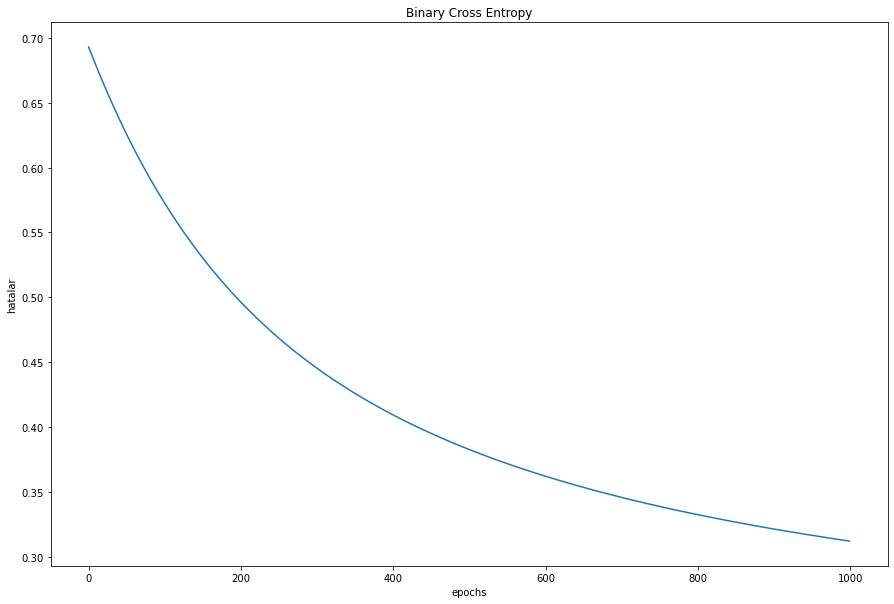

In [17]:
plt.plot(range(1000), logistic.J_Hist)
plt.title('Binary Cross Entropy')
plt.xlabel('epochs')
plt.ylabel('hatalar')
plt.gcf().set_size_inches(15, 10);
plt.show();

--------

# 5. Modeli Görselleştirme

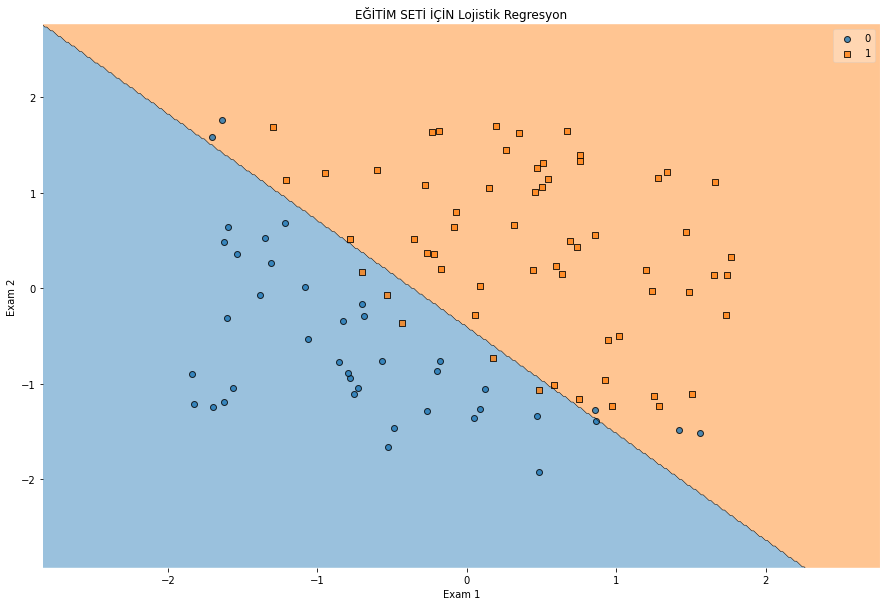

In [18]:
plot_decision_regions(X_scaled, y.ravel(), clf = logistic, markers = ['o', 's'])
plt.title('EĞİTİM SETİ İÇİN Lojistik Regresyon')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.gcf().set_size_inches(15, 10)
plt.show();

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
loj = LogisticRegression(solver = "liblinear", max_iter = 1000)

In [22]:
loj_model = loj.fit(X_scaled, y)

In [23]:
y_pred_train = loj_model.predict(X_scaled)

In [24]:
accuracy_score(y, y_pred_train)

0.89

-----------------